# BAB I. PERKENALAN


## =================================================

## Milestone 2

## Nama  : Ranie Sita Mannuela
## Batch : RMT-030

### Objective: 
#### Dalam industri e-commerce, mempertahankan pelanggan merupakan aspek kritis yang mempengaruhi keberlanjutan dan pertumbuhan pendapatan perusahaan. Studi menunjukkan bahwa tingkat retensi pelanggan sebesar 5% dapat meningkatkan keuntungan perusahaan hingga 25% sampai 95%. Mengingat persaingan yang ketat dan biaya akusisi pelanggan yang tinggi, perusahaan perlu memahami faktor-faktor yang berkontribusi terhadap churn pelanggan untuk mengembangkan strategi yang lebih efektif dalam mempertahakan pelanggan. 
#### Proyek ini bertujuan untuk mengembangkan model klasifikasi prediktif yang mengidentifikasi pelanggan yang berisiko tinggi untuk churn dari platform e-commerce. Dengan menggunakan teknik machine learning, model akan dilatih untuk mengenali pola dalam data pelanggan yang berkorelasi dengan kemungkinan pelanggan berhenti menggunakan layanan. Tujuan utama adalah untuk memberikan wawasan yang memungkinkan perusahaan melakukan intervensi yang tepat waktu dan personalisasi tawaran dalam memperbaiki pengalaman pelanggan, sehingga meningkatkan kepuasan dan retensi pelanggan. Pada model ini digunakan metrik F1-score dan ROC-AUC. Menggunakan F1-score karena akan membantu memastikan model secara efektif menangkap pelanggan yang berisiko churn (high recall) dengan meminimalkan gangguan terhadap pelanggan yang sebenarnya berlangganan (high precision). Menggunakan ROC-AUC untuk memberikan gambaran kemampuan model dalam membedakan antar pelanggan yang akan churn dan yang tidak, independen dari ambang klasifikasi yang dipilih.  
## =================================================

# BAB II. IMPORT LIBRARIES

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from feature_engine.outliers import Winsorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

# BAB III. DATA LOADING

In [95]:
# Data Loading
df=pd.read_csv('ecommerce_customer_data_custom_ratios.csv', nrows=6000)

In [170]:
# Menyimpan file csv limit
df.to_csv('ecommerce_customer_data_custom_ratios.csv', index=False)

In [96]:
# Konversi kolom 'Purchase Date' menjadi datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Membuat fitur baru
df['Year of Purchase'] = df['Purchase Date'].dt.year
df['Month of Purchase'] = df['Purchase Date'].dt.month
df['Day of Purchase'] = df['Purchase Date'].dt.day
df['Weekday of Purchase'] = df['Purchase Date'].dt.weekday # Senin=0, Minggu=6

In [97]:
# Check 10 data teratas
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,2020,9,8,1
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,3,5,5
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,5,23,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,2020,11,12,3
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,2020,11,27,4
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1,2023,3,7,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1,2023,4,15,5
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,49,Female,1,2021,3,27,5
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,49,Female,1,2020,5,5,1
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0,2023,9,13,2


In [98]:
# Check 10 data terbawah
df.tail(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase
5990,15205,2023-04-30 20:37:43,Books,99,3,2663,Cash,34,1.0,Charlotte Bell,34,Female,1,2023,4,30,6
5991,33574,2022-07-29 00:46:12,Electronics,192,4,4778,Crypto,46,NaN,William Bryan,46,Female,1,2022,7,29,4
5992,33574,2020-09-30 21:25:42,Clothing,17,5,1214,Cash,46,1.0,William Bryan,46,Female,1,2020,9,30,2
5993,33574,2022-07-24 17:24:39,Clothing,72,3,4390,Credit Card,46,1.0,William Bryan,46,Female,1,2022,7,24,6
5994,33574,2022-02-08 18:30:18,Books,426,4,4570,Credit Card,46,0.0,William Bryan,46,Female,1,2022,2,8,1
5995,33574,2022-11-21 04:13:05,Books,143,5,2001,PayPal,46,NaN,William Bryan,46,Female,1,2022,11,21,0
5996,33574,2023-06-05 08:54:48,Books,366,1,622,Crypto,46,1.0,William Bryan,46,Female,1,2023,6,5,0
5997,24533,2023-01-27 15:33:20,Clothing,57,3,810,Crypto,18,NaN,Jeffery Mathis,18,Male,1,2023,1,27,4
5998,24533,2023-03-05 23:37:15,Books,85,5,2603,Crypto,18,0.0,Jeffery Mathis,18,Male,1,2023,3,5,6
5999,24533,2022-10-22 06:38:19,Electronics,110,4,4394,Crypto,18,1.0,Jeffery Mathis,18,Male,1,2022,10,22,5


In [99]:
# Duplicate Dataset
df_duplicate = df.copy()
df_duplicate

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,2020,9,8,1
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,3,5,5
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,5,23,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,2020,11,12,3
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,2020,11,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,33574,2022-11-21 04:13:05,Books,143,5,2001,PayPal,46,NaN,William Bryan,46,Female,1,2022,11,21,0
5996,33574,2023-06-05 08:54:48,Books,366,1,622,Crypto,46,1.0,William Bryan,46,Female,1,2023,6,5,0
5997,24533,2023-01-27 15:33:20,Clothing,57,3,810,Crypto,18,NaN,Jeffery Mathis,18,Male,1,2023,1,27,4
5998,24533,2023-03-05 23:37:15,Books,85,5,2603,Crypto,18,0.0,Jeffery Mathis,18,Male,1,2023,3,5,6


In [171]:
# Check ukuran dataset (baris dan kolom)
print(df.shape)

(6000, 18)


In [101]:
# Check informasi data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer ID            6000 non-null   int64         
 1   Purchase Date          6000 non-null   datetime64[ns]
 2   Product Category       6000 non-null   object        
 3   Product Price          6000 non-null   int64         
 4   Quantity               6000 non-null   int64         
 5   Total Purchase Amount  6000 non-null   int64         
 6   Payment Method         6000 non-null   object        
 7   Customer Age           6000 non-null   int64         
 8   Returns                4879 non-null   float64       
 9   Customer Name          6000 non-null   object        
 10  Age                    6000 non-null   int64         
 11  Gender                 6000 non-null   object        
 12  Churn                  6000 non-null   int64         
 13  Yea

In [102]:
# Check dataset-2
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,6000.0,25197.368667,14.0,12384.0,25638.0,37460.0,49972.0,14531.915163
Purchase Date,6000,2021-11-10 04:57:59.837000192,2020-01-01 00:34:38,2020-11-30 22:24:37.500000,2021-11-07 02:23:01.500000,2022-10-28 00:59:22.249999872,2023-09-15 08:10:13,NaN
Product Price,6000.0,253.805167,10.0,127.0,255.0,379.0,500.0,142.847005
Quantity,6000.0,2.984333,1.0,2.0,3.0,4.0,5.0,1.422354
Total Purchase Amount,6000.0,2747.405667,121.0,1519.75,2761.0,3993.25,5342.0,1440.016233
Customer Age,6000.0,43.536667,18.0,30.0,44.0,56.0,70.0,15.164245
Returns,4879.0,0.502767,0.0,0.0,1.0,1.0,1.0,0.500044
Age,6000.0,43.536667,18.0,30.0,44.0,56.0,70.0,15.164245
Churn,6000.0,0.209667,0.0,0.0,0.0,0.0,1.0,0.407105
Year of Purchase,6000.0,2021.388667,2020.0,2020.0,2021.0,2022.0,2023.0,1.091545


In [103]:
# Check tipe data dari setiap kolom
print(df.dtypes)

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
Year of Purchase                  int32
Month of Purchase                 int32
Day of Purchase                   int32
Weekday of Purchase               int32
dtype: object


In [104]:
# Check apakah ada nilai yang hilang atau null pada dataset
print(df.isnull().sum())

Customer ID                 0
Purchase Date               0
Product Category            0
Product Price               0
Quantity                    0
Total Purchase Amount       0
Payment Method              0
Customer Age                0
Returns                  1121
Customer Name               0
Age                         0
Gender                      0
Churn                       0
Year of Purchase            0
Month of Purchase           0
Day of Purchase             0
Weekday of Purchase         0
dtype: int64


In [105]:
# Check apakah ada nilai yang duplikat pada dataset
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Customer ID, Purchase Date, Product Category, Product Price, Quantity, Total Purchase Amount, Payment Method, Customer Age, Returns, Customer Name, Age, Gender, Churn, Year of Purchase, Month of Purchase, Day of Purchase, Weekday of Purchase]
Index: []


Insight:

- Jumlah data atau objek pengamatan adalah sebanyak 6000 dari dataset ecommerce_customer_data_custom_ratios.
- Dapat diperhatikan bahwa data terdiri dari 1 kolom kategori, 4 kolom object, 4 kolom int32, 7 kolom int64, 1 kolom tipe datetime, dan 1 kolom dengan tipe float. Terdapat nilai null pada kolom 'Returns'. Serta tidak ada data yang duplikat.

# BAB IV. EXPLORATORY DATA ANALYSIS (EDA)

In [106]:
# Check statistik dasar pada kolom churn
df['Churn'].describe()

count    6000.000000
mean        0.209667
std         0.407105
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

In [107]:
# Check distribusi data atau menghitung skewness
Churn_skewness = df['Churn'].skew()
print(f"Skewness dari Churn: {Churn_skewness}")

Skewness dari Churn: 1.426808361285968


Insight :
- Pada statistik dasar di kolom 'Churn' diketahui nilai mean adalah 0.209667 dengan nilai max adalah 1 dimana perbedaannya cukup jauh.
- Telah dilakukan pengecekan distribusi data dan diketahui nilai skewness dari kolom 'Churn' adalah 1.426808361285968 maka data terdistribusi tidak normal (skew). Untuk nilai skewness > 0, maka data condong ke kanan (right-skewed atau positive skew).

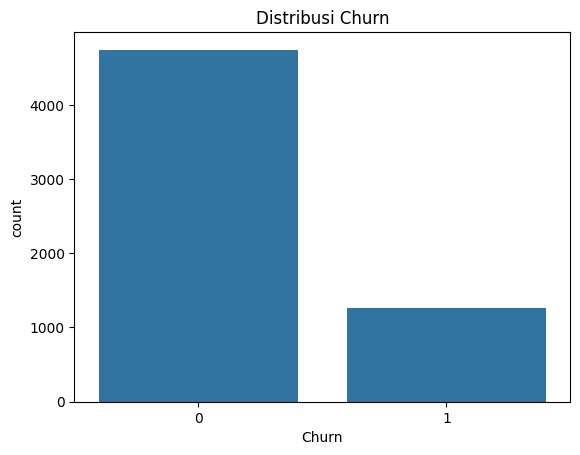

/var/folders/ch/hkqw151d13dgdbbl5rm2dxsc0000gn/T/ipykernel_1819/3258119109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Category', y='Total Purchase Amount', data=df, palette='viridis')


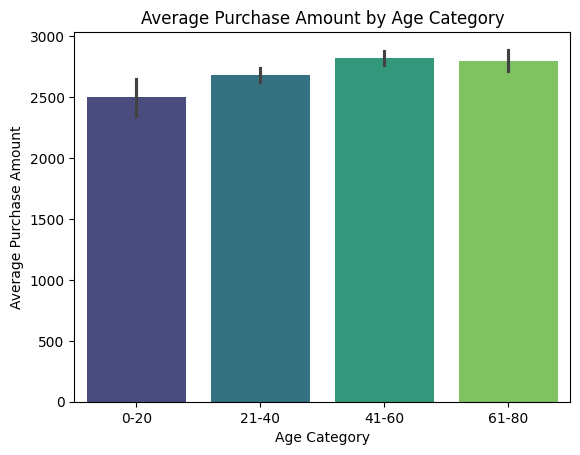

/var/folders/ch/hkqw151d13dgdbbl5rm2dxsc0000gn/T/ipykernel_1819/3258119109.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product Category', data=df, palette='bright')


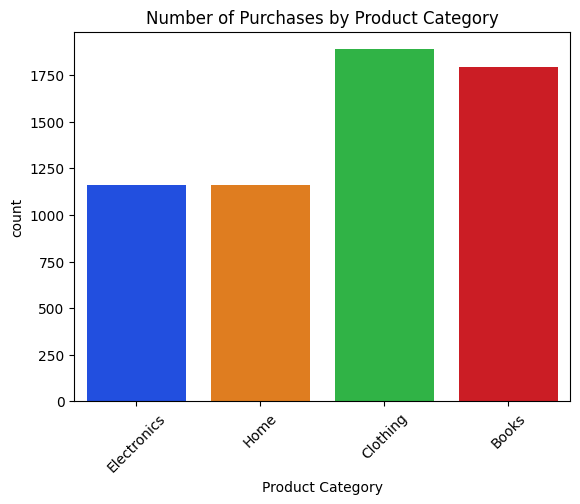

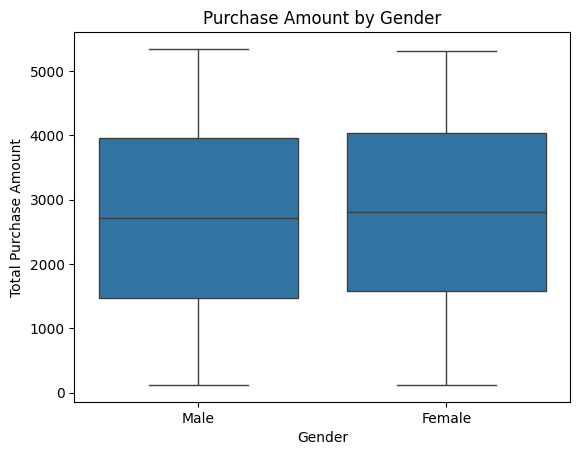

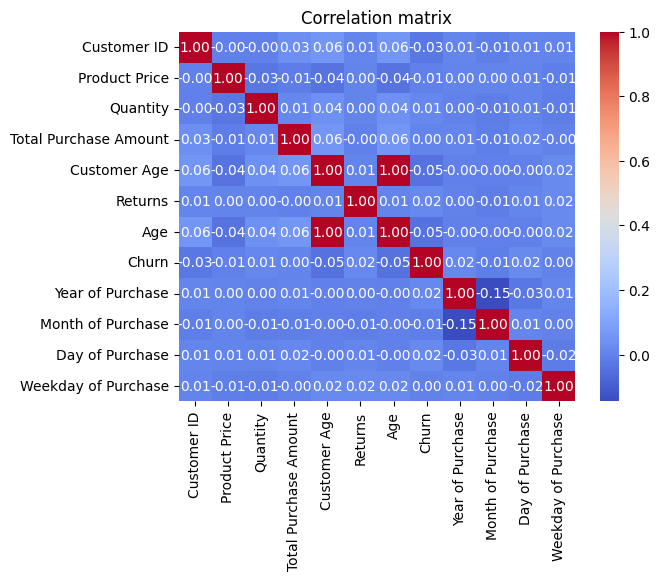

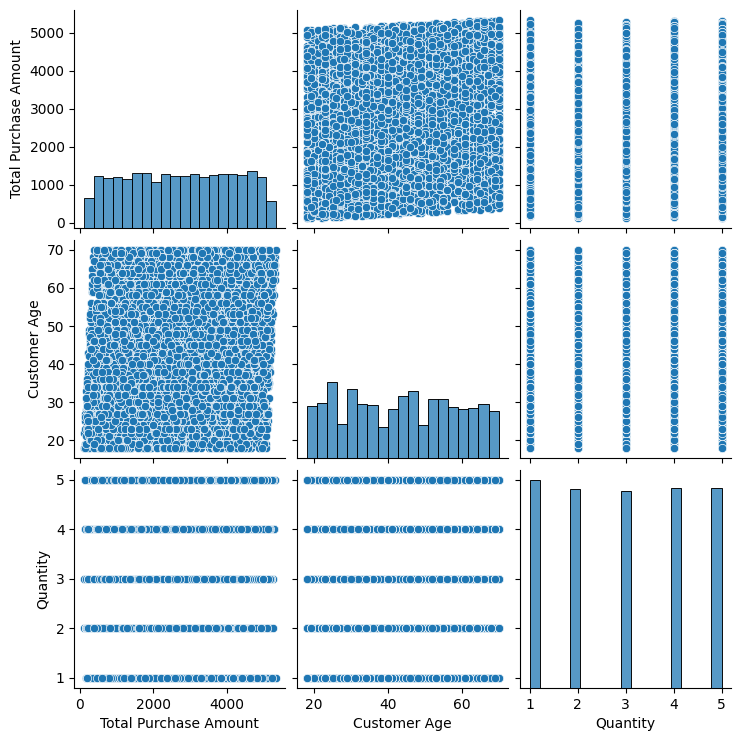

In [108]:
# Visualisasi Data Sederhana

# Distribusi variabel Churn
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Churn')
plt.show()

# Jumlah Pembelian Rata-rata berdasarkan Kategori Usia
df['Age Category'] = pd.cut(df['Customer Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])
sns.barplot(x='Age Category', y='Total Purchase Amount', data=df, palette='viridis')
plt.title('Average Purchase Amount by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Purchase Amount')
plt.show()

# Jumlah Pembelian Berdasarkan Kategori Produk
sns.countplot(x='Product Category', data=df, palette='bright')
plt.title('Number of Purchases by Product Category')
plt.xticks(rotation=45)
plt.show()

# Jumlah Pembelian berdasarkan Jenis Kelamin
sns.boxplot(x='Gender', y='Total Purchase Amount', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

# Heatmap korelasi variabel numerik
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix =  df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# Pairwise pada beberapa variabel numerik dalam dataset
sns.pairplot(df[['Total Purchase Amount', 'Customer Age', 'Quantity']])
plt.show()


In [109]:
# Check kembali daftar kolom dalam data
print(df.columns)

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn',
       'Year of Purchase', 'Month of Purchase', 'Day of Purchase',
       'Weekday of Purchase', 'Age Category'],
      dtype='object')


Kesimpulan :
- Distribusi Churn : Grafik menunjukkan bahwa jumlah pelanggan yang tidak churn (0) jauh lebih banyak dibandingkan yang churn (1). Hal ini menunjukkan bahwa sebagian besar pelanggan atau customer memilih untuk tetap berlangganan atau terus menggunakan layanan/jasa yang tersedia.
- Average Purchase Amount by Age Category : Grafik menunjukkan bahwa rata-rata jumlah pembelian cukup seragam diantara semua kategori usia, dengan kategori usia 41-60 memiliki rata-rata pembelian sedikit lebih tinggi dibandingkan kategori usia lainnya. Hal ini menunjukkan bahwa usia tidak memiliki pengaruh besar terhadap jumlah pembelian yang dilakukan.
- Number of Purchases by Product Category : Grafik menunjukkan bahwa jumlah pembelian untuk kategori 'Books' dan 'Clothing' lebih tinggi dibandingkan 'Electronics' dan 'Home'. Hal ini bisa menunjukkan preferensi atauu kebutuhan customer terhadap produk tertentu yang lebih tinggi dalam kategori buku dan pakaian.
- Purchase Amount by Gender : Boxplot menunjukkan bahwa distribusi jumlah pembelian antara male dan female yang hampir serupa. Median pembelian antara kedua gender hampir sama, hal ini menunjukkan bahwa gender tidak memiliki pengaruh signifikan terhadap jumlah pembelian.
- Correlation matrix : Heatmap menunjukkan bahwa sebagian besar variabel kurang memiliki korelasi yang kuat satu sama lain.
- Pairwise pada beberapa variabel numerik dalam dataset : Pairwise plot menggambarkan hubungan antara 'Total Purchase Amount', 'Customer Age', dan 'Quantity'. Grafik ini menunjukkan hubungan yang sangat tersebar dan tidak menunjukkan pola korelasi yang cukup jelas, yang sesuai dengan hasil dari matriks korelasi. Distribusi untuk 'Customer Age' dan 'Quantity' cenderung uniform, sedangkan untuk 'Total Purchase Amount' cenderung terpusat di nilai-nilai yang lebih rendah.

# BAB V. FEATURE ENGINEERING

### - Split between X (Features) and y (Target)

In [110]:
#Splitting between 'X' and 'y'

X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase,Age Category
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,2020,9,8,1,21-40
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,2022,3,5,5,21-40
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,2022,5,23,0,21-40
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,2020,11,12,3,21-40
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,2020,11,27,4,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,33574,2022-11-21 04:13:05,Books,143,5,2001,PayPal,46,NaN,William Bryan,46,Female,2022,11,21,0,41-60
5996,33574,2023-06-05 08:54:48,Books,366,1,622,Crypto,46,1.0,William Bryan,46,Female,2023,6,5,0,41-60
5997,24533,2023-01-27 15:33:20,Clothing,57,3,810,Crypto,18,NaN,Jeffery Mathis,18,Male,2023,1,27,4,0-20
5998,24533,2023-03-05 23:37:15,Books,85,5,2603,Crypto,18,0.0,Jeffery Mathis,18,Male,2023,3,5,6,0-20


### - Splitting between Train-Set and Test-set

In [111]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (4800, 17)
Test Size:  (1200, 17)


### - Drop Unnecessary Columns

Berdasarkan EDA, akan dihilangkan beberapa fitur yang menurut saya tidak memberikan dampak tinggi terhadap prediksi dan dilakukan drop kolom pada 'Age' karena terjadi double kolom dengan describe yang sama dengan kolom 'Customer Age'

In [112]:
X_train.drop(['Customer ID','Customer Name', 'Purchase Date', 'Age'], axis=1, inplace=True)

In [113]:
X_test.drop(['Customer ID','Customer Name', 'Purchase Date', 'Age'], axis=1, inplace=True)

In [114]:
X_train.columns, X_test.columns

(Index(['Product Category', 'Product Price', 'Quantity',
        'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
        'Gender', 'Year of Purchase', 'Month of Purchase', 'Day of Purchase',
        'Weekday of Purchase', 'Age Category'],
       dtype='object'),
 Index(['Product Category', 'Product Price', 'Quantity',
        'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
        'Gender', 'Year of Purchase', 'Month of Purchase', 'Day of Purchase',
        'Weekday of Purchase', 'Age Category'],
       dtype='object'))

### - Feature Selection using Feature Importance

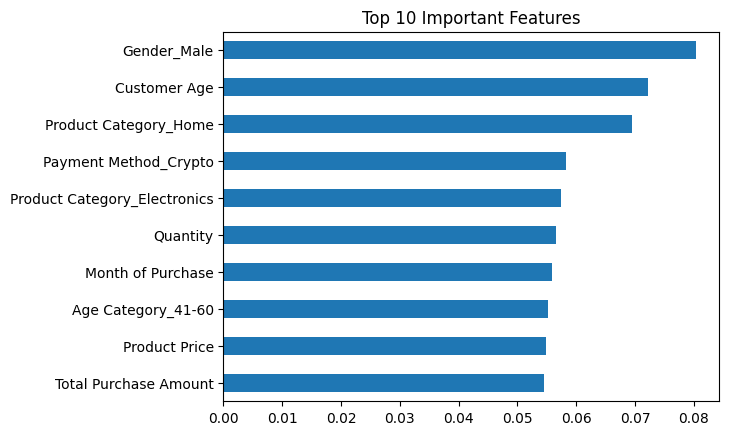

In [115]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# membuat dan melatih model XGBoost
model = XGBClassifier(enable_categorical=True, random_state=42)
model.fit(X_train_encoded, y_train)

# menghitung dan menampilkan fitur penting
feature_importances = pd.Series(model.feature_importances_, index=X_train_encoded.columns)
ax=feature_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.title('Top 10 Important Features')
plt.show()

Dari important features, 10 feature terlihat tidak jauh berbeda dan memiliki dampak besar namun terdapat 3 feature yang memiliki dampak paling besar adalah
- Gender pada male
- Customer Age
- Product Category pada home

### - Split Numeric Columns and Categorical Columns

In [116]:
# split numerik
numerical_data = df.select_dtypes(include=['int64', 'int32','float64'])

# split kategorik
categorical_data = df.select_dtypes(include=['object', 'category'])

numerical_data, categorical_data

(      Customer ID  Product Price  Quantity  Total Purchase Amount  \
 0           46251             12         3                    740   
 1           46251            468         4                   2739   
 2           46251            288         2                   3196   
 3           46251            196         1                   3509   
 4           13593            449         1                   3452   
 ...           ...            ...       ...                    ...   
 5995        33574            143         5                   2001   
 5996        33574            366         1                    622   
 5997        24533             57         3                    810   
 5998        24533             85         5                   2603   
 5999        24533            110         4                   4394   
 
       Customer Age  Returns  Age  Churn  Year of Purchase  Month of Purchase  \
 0               37      0.0   37      0              2020                  9

### - Handling Cardinality

In [117]:
obj_col = X_train.select_dtypes(include=['object', 'category'])
for cat in obj_col:
  count = len(X_train[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Product Category is 4
Cardinality of column Payment Method is 4
Cardinality of column Gender is 2
Cardinality of column Age Category is 4


- Tidak ada kardinal yang tinggi pada feature

### - Handling Outlier

##### Handling Outliers in Train Set

In [118]:
X_train.describe()

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase
count,4800.000000,4800.000000,4800.000000,4800.000000,3913.000000,4800.000000,4800.000000,4800.000000,4800.00000
mean,254.033333,2.973542,2740.051042,43.549583,0.508050,2021.386042,6.228958,15.498125,2.96875
std,142.282482,1.427971,1444.814521,15.208136,0.499999,1.093433,3.343481,8.811801,1.99203
min,10.000000,1.000000,122.000000,18.000000,0.000000,2020.000000,1.000000,1.000000,0.00000
25%,129.000000,2.000000,1496.000000,30.000000,0.000000,2020.000000,3.000000,8.000000,1.00000
50%,254.000000,3.000000,2747.000000,44.000000,1.000000,2021.000000,6.000000,15.000000,3.00000
75%,378.250000,4.000000,3999.000000,57.000000,1.000000,2022.000000,9.000000,23.000000,5.00000
max,500.000000,5.000000,5342.000000,70.000000,1.000000,2023.000000,12.000000,31.000000,6.00000


In [119]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Product Price outliers = 0.00%
Column Quantity outliers = 0.00%
Column Total Purchase Amount outliers = 0.00%
Column Customer Age outliers = 0.00%
Column Returns outliers = 0.00%
Column Year of Purchase outliers = 0.00%
Column Month of Purchase outliers = 0.00%
Column Day of Purchase outliers = 0.00%
Column Weekday of Purchase outliers = 0.00%


##### Handling Outliers in Test Set

In [120]:
X_test.describe()

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Year of Purchase,Month of Purchase,Day of Purchase,Weekday of Purchase
count,1200.000000,1200.00000,1200.000000,1200.000000,966.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,252.892500,3.02750,2776.824167,43.485000,0.481366,2021.399167,5.929167,15.511667,3.036667
std,145.139567,1.39942,1420.876452,14.993569,0.499911,1.084349,3.362574,8.660102,1.985012
min,10.000000,1.00000,121.000000,18.000000,0.000000,2020.000000,1.000000,1.000000,0.000000
25%,120.000000,2.00000,1597.250000,30.000000,0.000000,2020.000000,3.000000,8.000000,1.000000
50%,258.500000,3.00000,2807.000000,44.000000,0.000000,2021.000000,6.000000,15.000000,3.000000
75%,380.000000,4.00000,3970.250000,56.000000,1.000000,2022.000000,8.250000,23.000000,5.000000
max,500.000000,5.00000,5322.000000,70.000000,1.000000,2023.000000,12.000000,31.000000,6.000000


In [121]:
num_test = X_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Product Price outliers = 0.00%
Column Quantity outliers = 0.00%
Column Total Purchase Amount outliers = 0.00%
Column Customer Age outliers = 0.00%
Column Returns outliers = 0.00%
Column Year of Purchase outliers = 0.00%
Column Month of Purchase outliers = 0.00%
Column Day of Purchase outliers = 0.00%
Column Weekday of Purchase outliers = 0.00%


- Tidak ada outlier pada x train dan x test

### - Handling Missing Value

In [122]:
# Menghitung median dari kolom 'Returns'
median_returns = X_train['Returns'].median()
# Mengisi missing value dengan median
X_train['Returns'] = X_train['Returns'].fillna(median_returns)
X_test['Returns'] = X_test['Returns'].fillna(median_returns)

In [123]:
X_train.isnull().sum()

Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Gender                   0
Year of Purchase         0
Month of Purchase        0
Day of Purchase          0
Weekday of Purchase      0
Age Category             0
dtype: int64

In [124]:
X_test.isnull().sum()

Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Gender                   0
Year of Purchase         0
Month of Purchase        0
Day of Purchase          0
Weekday of Purchase      0
Age Category             0
dtype: int64

In [125]:
y_train.isnull().sum()

0

In [126]:
y_test.isnull().sum()

0

- Sebelumnya terdapat missing value pada kolom 'Returns' dan ditangani dengan metode imputasi. Setelahnya tidak ada missing value pada x train, x test, y train dan y test maka proses dapat dilanjutkan pada tahap encoding dan scalling.

### - Column Transformer

In [127]:
# Menentukan kolom numerik yang akan diubah skala
numeric_features = ['Product Price', 'Quantity', 'Total Purchase Amount',
                    'Customer Age', 'Returns','Year of Purchase', 'Month of Purchase', 
                    'Day of Purchase','Weekday of Purchase']
categorical_features = ['Product Category','Payment Method','Gender','Age Category']


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Melakukan fitting dan transformasi pada data training
X_train_scaled =  preprocessor.fit_transform(X_train)

# Melakukan fitting dan transformasi pada data test
X_test_scaled = preprocessor.transform(X_test)


# BAB VI. MODEL DEFINITION

In [128]:
# 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

- Algoritma/model : Decision Tree Classifier
- Alasan penggunaan : Cocok untuk data dengan struktur hirarkis dan mudah diinterpretasikan. Efektif pada dataset yang tidak terlalu  besar dan kompleks, dimana hubungan non-linear tidak terlalu dominan
- Metrics : Accuracy, precision, recall, F1-score

In [129]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

- Algoritma/model : Random Forest Classifier
- Alasan penggunaan : Mengurangi overfitting yang sering terjadi pada decision tree tunggal dan umumnya meningkatkan akurasi yang lebih baik. Sangat baik untuk dataset besar dengan fitur numerik dan kategorikal, serta ketika model yangg lebih robust dan kurang sensitif terhadap noise dalam data dibutuhkan
- Metrics : Accuracy, precision, recall, F1-score

In [130]:
# 3. XGBoost Classifier
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

- Algoritma/model : XGBoost Classifier
- Alasan penggunaan : Sangat efisen, fleksibel, dan memberikan kinerja yang sangat baik pada berbagai masalah klasifikasi. Ideal pada situasi  dimana kinerja dan kecepatan adala perrhatian utama dan sangat efektif  pada dataset yang besar dan kompleks
- Metrics : Accuracy, precision, recall, F1-score

In [131]:
# 4. KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

- Algoritma/model : KNeighbors Classifier
- Alasan penggunaan : KNN adalah algoritma yang sederhana dan efektif, baik untuk klasifikasi maupun regresi. Dapat menangani dataset dengan baik tanpa membuat asumsi tentang distribusi data
- Metrics : Accuracy, precision, recall, F1-score

In [132]:
# 5. SVM
from sklearn.svm import SVC

model_svm = SVC()

- Algoritma/model : Support Vector Machine (SVM)
- Alasan penggunaan : Efektik menangani data kompleks atau dataset dengan banyak fitur, dan dapat bekerja dengan baik dalam kelas data yang terpisah secara linear atau non-linear
- Metrics : Accuracy, precision, recall, F1-score

# BAB VII. MODEL TRAINING

### - Modelling

In [133]:
# Membuat pipeline untuk Decision Tree
pipe_dt = Pipeline([
('preprocessor', preprocessor),
('classifier', DecisionTreeClassifier())
])

# Membuat pipeline untuk Random Forest
pipe_rf = Pipeline([
('preprocessor', preprocessor),
('classifier', RandomForestClassifier())
])

# Membuat pipeline untuk XGBoost
pipe_xgb = Pipeline([
('preprocessor', preprocessor),
('classifier', XGBClassifier())
])

# Membuat pipeline untuk KNN
pipe_knn = Pipeline([
('preprocessor', preprocessor),
('classifier', KNeighborsClassifier())
])

# Membuat pipeline untuk SVM
pipe_svm = Pipeline([
('preprocessor', preprocessor),
('classifier', SVC(kernel='rbf'))
])

### - Base Model Evaluation

##### 1.  Decision Tree Classifier

In [134]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.6742


In [135]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([0, 0, 0, ..., 1, 0, 0])

In [136]:
target = ['Not Churn', 'Churn']
print(classification_report(y_test, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

   Not Churn       0.79      0.79      0.79       939
       Churn       0.25      0.26      0.26       261

    accuracy                           0.67      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.68      0.67      0.67      1200



In [137]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.22421525 0.22799423 0.22707424]
F1 Score - Mean - Cross Validation :  0.22642790347961986
F1 Score - Std - Cross Validation  :  0.0016090336921887414
F1 Score - Range of Test-Set       :  0.22481886978743112 - 0.2280369371718086


##### 2. Random Forest Classifier

In [138]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.7817


In [139]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
target = ['Not Churn', 'Churn']
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

   Not Churn       0.78      1.00      0.88       939
       Churn       0.00      0.00      0.00       261

    accuracy                           0.78      1200
   macro avg       0.39      0.50      0.44      1200
weighted avg       0.61      0.78      0.69      1200



In [141]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0. 0. 0.]
F1 Score - Mean - Cross Validation :  0.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  0.0 - 0.0


##### 3. XGBoost Classifier

In [142]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9848
Testing Score:  0.7583


In [143]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
target = ['Not Churn', 'Churn']
print(classification_report(y_test, y_xgb_pred, target_names = target))

              precision    recall  f1-score   support

   Not Churn       0.79      0.95      0.86       939
       Churn       0.30      0.08      0.13       261

    accuracy                           0.76      1200
   macro avg       0.54      0.51      0.49      1200
weighted avg       0.68      0.76      0.70      1200



In [145]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.13302752 0.11004785 0.14446953]
F1 Score - Mean - Cross Validation :  0.12918163192836662
F1 Score - Std - Cross Validation  :  0.014313307461243662
F1 Score - Range of Test-Set       :  0.11486832446712296 - 0.14349493938961028


##### 4. KNN

In [146]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.8104
Testing Score:  0.7517


In [147]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([0, 0, 1, ..., 0, 0, 0])

In [148]:
target = ['Not Churn', 'Churn']
print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

   Not Churn       0.79      0.94      0.86       939
       Churn       0.27      0.08      0.12       261

    accuracy                           0.75      1200
   macro avg       0.53      0.51      0.49      1200
weighted avg       0.67      0.75      0.70      1200



In [149]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.0861678  0.08275862 0.11312217]
F1 Score - Mean - Cross Validation :  0.09401619769629042
F1 Score - Std - Cross Validation  :  0.013581465696061494
F1 Score - Range of Test-Set       :  0.08043473200022894 - 0.10759766339235191


##### 5. SVM

In [150]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.7923
Testing Score:  0.7825


In [151]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
target = ['Not Churn', 'Churn']
print(classification_report(y_test, y_svm_pred, target_names = target))

              precision    recall  f1-score   support

   Not Churn       0.78      1.00      0.88       939
       Churn       0.00      0.00      0.00       261

    accuracy                           0.78      1200
   macro avg       0.39      0.50      0.44      1200
weighted avg       0.61      0.78      0.69      1200



/Applications/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0. 0. 0.]
F1 Score - Mean - Cross Validation :  0.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  0.0 - 0.0


##### Base Model Comparison

In [154]:
models = {
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb,
    'KNN' : pipe_knn,
    'SVM' : pipe_svm
}

metrics = {
    'ROC-AUC Score' : roc_auc_score,
    'F1-Score' : f1_score,
}
for model_name, model in models.items():
    model.fit(X_train, y_train)

df_model = pd.DataFrame(columns = models.keys(), index=['ROC-AUC Score', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [155]:
df_model

,Decision Tree,Random Forest,XGBoost,KNN,SVM
ROC-AUC Score,0.530052,0.498935,0.513606,0.509346,0.5
F1-Score,0.26742,0.0,0.126506,0.123529,0.0


In [156]:
models = {
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb,
    'KNN' : pipe_knn,
    'SVM' : pipe_svm
}

metrics = {
    'Mean' : 'mean',
    'Std' : 'std'
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for metric in metrics.keys():
  for model_name, model in models.items():
    scores =  cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    if metrics[metric] == 'mean':
      df_cross_val.loc['Mean', model_name] = scores.mean()
    elif metrics[metric] == 'std':
        df_cross_val.loc['Std', model_name] = scores.std()

df_cross_val

,Decision Tree,Random Forest,XGBoost,KNN,SVM
Mean,0.224052,0.001996,0.129182,0.094016,0.0
Std,0.01619,0.002823,0.014313,0.013581,0.0


- Dari hasil metrik telah dilakukan evaluasi, dapat disimpulkan bahwa Decision Tree merupakan yang terbaik pada dataset ini, ditunjukkan dengan skor ROC-AUC tertinggi 0.530052 dan F1-Score yang relatif tinggi 0.26742 dibandingkan dengan model lainnya. Hal tersebut menandakan bahwa dengan model Decision Tree memiliki kemampuan yang baik dalam mengklasifikasikan kedua kelas(Not Churn dan Churn).

### - Model Optimization Evaluation

##### Model Optimization

In [162]:
#Parameter Tuning

param_dt = {
    'classifier__max_depth' : [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split' : [2, 5, 10, 20],
    'classifier__min_samples_leaf' : [1, 2, 4, 6],
    'classifier__criterion' : ['gini', 'entropi']
}

##### Decision Tree

In [163]:
grid_dt = GridSearchCV(
    estimator=pipe_dt, 
    param_grid=param_dt, 
    cv=5, 
    scoring='f1', 
    verbose=2, 
    n_jobs=-1)
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifi

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Product '
                                                                          'Price',
                                                                          'Quantity',
                                                                          'Total '
                                                                          'Purchase '
                                                                          'Amount',
                                                                          'Customer '
                                                                          'Age',
                                                                          'Returns',
                                                                          'Year '
                                                                          'of '
                                                                          'Purchase',
                                                                          'Month '
                                                                          'of '
                                                                          'Purchase',
                                                                          'Day '
                                                                          'of '
                                                                          'Purchase',
                                                                          'Weekday '
                                                                          'of '
                                                                          'Purchase']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Product '
                                                                          'Category',
                                                                          'Payment '
                                                                          'Method',
                                                                          'Gender',
                                                                          'Age '
                                                                          'Category'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropi'],
                         'classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'classifier__min_samples_leaf': [1, 2, 4, 6],
                         'classifier__min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=2)

In [164]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  1.0
Test Set Score :  0.25


In [165]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__criterion': 'gini', 'classifier__max_depth': 40, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Product Price', 'Quantity',
                                                   'Total Purchase Amount',
                                                   'Customer Age', 'Returns',
                                                   'Year of Purchase',
                                                   'Month of Purchase',
                                                   'Day of Purchase',
                                                   'Weekday of Purchase']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product Category',
                          

In [166]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       939
           1       0.25      0.25      0.25       261

    accuracy                           0.68      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.68      0.68      0.68      1200



- Hasil dari classification menunjukkan model Decision Tree memiliki nilai precision, recall, dan f1-score yang berbeda untuk kedua kelas churn (1) dan not churn (0). Berdasarkan hasil, meskipun model memilki akurasi yang cukup tinggi (0.68), namun belum dapat dikatakan bahwa model Decision Tree sudah good fit.

### - Model After Tuning Comparison

In [167]:
models = {
    'Decision Tree' : best_pipe_dt
}

metrics = {
    'ROC-AUC Score' : roc_auc_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['ROC-AUC Score', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [168]:
df_model

,Decision Tree,Random Forest,XGBoost,KNN,SVM
ROC-AUC Score,0.530052,0.498935,0.513606,0.509346,0.5
F1-Score,0.26742,0.0,0.126506,0.123529,0.0


In [169]:
model_tuning

,Decision Tree
ROC-AUC Score,0.523031
F1-Score,0.25


- Decision Tree: setelah tuning, ROC-AUC score dan F1-scorre untuk Decision Tree mengalami penurunan yang tidak signifikan. Meskipun performa tidak optimal, namun Decision Tree menjadi moodel terbaik diantara model lainnya walaupun dengan hasil menunjukkan overfit dan dilihat pada model ini terdapat keterbatasan dalam mengklasifikasikan kelas minoritas secara efektif.

# BAB IX. MODEL SAVING

### - Save Model

In [173]:
import pickle

pickle.dump(best_pipe_dt, open('model_dt.pkl', 'wb'))

# BAB X. MODEL INFERENCE

- Bagian model inference dibuat pada notebook berbeda dengan nama file P1M2_ranie_sita_inf.ipynb 

# BAB XI. CONCLUSION

1. Narasi based on EDA :
    - Berdasarkan hasil EDA, dapat dilihat bahwa terdapat ketidakseimbangan kelas antara kelas 0 (not churn) dengan kelas 1 (churn). Dengan menggunakan visualisasi data dan analisis statistik, dapat diindentifikasikan beberapa pola penting seperti frekuensi pembelian, jumlah transaksi, dan preferensi kategori produk yang mempengaruhi kecenderungan pelanggan atau customer untuk churn dan berdasarkan dari 'Top 10 Important Feature' terdapat 3 feature yang memiliki dampak paling besar adalah gender dengan kategori 'male', customer age, dan product category pada kategori 'home'.

2. Narasi based on Model Evaluation :
    - Setelah dilatih dengan beberapa model (Decision Tree, Random Forest, XGBoost, KNN, dan SVM), dapat diliat bahwa model Decision Tree menunjukkan kinerja yang paling optimal berdasarkan skor ROC-AUC dan F1-Score. Setelah dilakukan tuning, skor ROC-AUC model Decision Tree mengalami penurunan yang tidak signifikan. Meskipun performa tidak optimal, namun Decision Tree menjadi moodel terbaik diantarra model lainnya dan dilihat pada model ini terdapat keterbatasan dalam mengklasifikasikan kelas minoritas secara efektif.

3. Narasi based on Model Analysis :
    - Model Decision Tree memberikan hasil yang cukup baik dalam mengklasifikasikan pelanggan yang tidak akan churn (0), model ini menunjukkan keterbatasan dalam mengidentifikasi pelanggan yang akan churn (1) dimana ditunjukkan nilai F1-Score yang rendah pada kelas tersebut. Hal ini mengindikasikan bahwa model mungkin overfit terhadap mayoritas kelas yang tidak churn (0) dan kurang efektif pada kelas minoritas.

4. Further Improvement :
    - Untuk meningkatkan performa model dalam mengidentifikasikan pelanggan yang berpotensi churn, dapat mempertimbangkan dalam melakukan teknik resampling seperti oversampling atau undersampling untuk mengatasi ketidakseimbangan kelas. Selain itu, mengoptimalkan parameter pada model Decision Tree akan membantu mengurangi overfitting dan meningkatkan akurasi prediksi untuk kelas minoritas.

5. Hal lain:
    - Implementasi Model di industry :penerapan model ini di industri e-commerce bisa sangat berguna dalam mengindikasikan pelanggan yang berisiko churn. Dengan intervensi dini berdasarkan prediksi model, perusahaan dapat menargetkan strategi retensi yang lebih personal dan efektif, yang tidak hanya meningkatkan kepuasan pelanggan tetapi juga keberlanjutan bisnis jangka panjang. Model ini juga dapat diintegrasikan ke dalam sistem CRM untuk automasi pemasaran dan personalisasi tawaran berdasarkan prediksi churn pelanggan.



### - Conceptual Problems
1. Latar belakang dan cara kerja Bagging 
    - Latar belakang : Bagging merupakan singkatan dari Bootstrap Aggregating, adalah teknik ensemble learning dalam machine learning yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma  machine learning yang  digunakan pada dataset tertentu. Bagging membantu mengurangi varians dan menghindari overfitting, yang sering kali merupakan masalah besar dalam model prediktif seperti decision trees. Overfitting terjadi ketika  model sangat sesuai dengan data latihan hingga kehilangan kapasitas untuk generalisasi pada data baru.
    -  Cara kerja Bagging :
        1. Bootstrap Sampling :  Bagging dimulai dari proses bootstrap sampling, yang berarti secara acak memilih subset dari data dengan  penggantian. Hal ini berarti beberapa sample mungkin akan muncul lebih  dari satu kali dalam subset yang sama dan beberapa yang lainnya mungkin tidak muncul sama sekali.
        2. Membanggun Model Independen : Dari masing-masing subset data ini, model prediktif independen dibangun. Proses ini umumnya  melibatkan model yangg  memilki varians tinggi danbias rendah, seperti decision trees.
        3. Aggregasi : Setelah model independen terbentuk dari setiap subset bootstrap, prediksi dari setiap model digabungkan untuk  membuat prediksi akhir. Dalam kasus regresi, hal ini biasanya adalah rata-rata dari prediksi, sedangkan dalam klasifikasi adalah voting mayoritas.
        Dengan menggabungkan predksi dari beberapa model, bagging mengurangi rsiko kesalahan yang mungkin berasal dari model yang  overfit maka akan memberikan hasl yang lebih stabil.

2. Perbedaan cara kerja algoritma Random Forest dengan algoritma boosting (XGBoost)
    - Kecepatan dan skalabilitas
        1. XGBoost : Umumnya lebih cepat dari Random Forest karena cara kerjanya yang efisien dalam mengelola data dan kemampuannya untuk melakukan perhitungan secara bersamaan (paralel). Hal ini membuat XGBoost cocok untuk mengolah data besar atau kompleks dalam waktu yang lebih singkat.
        2. Random Forest : Meskipun bisa cepat, namun terkadang lebih lambat dibandingkan XGBoost terutama dalam menghadapi dataset yang  sangat besar atau rumit karena memproses setiap pohon secara mandiri tanpa memanfaatkan komputasi paralel seefisien XGBoost.
    - Kinerja 
        1. XGBoost : Cenderungg memiliki performa yang lebih baik, terutama dalam menangani dataset yang rumit atau detail. XGBoost dirancang  untuk secara akurat memperbaiki kesalahan dari pohon sebelumnya dan meminimalkan kelebihan fitur (overfitting), yang berarti model sering kalii lebih tepat  dan dapat diandalkan.
        2. Random Forest : Sangat baik dalam banyak kasus tetapi bisa kurang efektif daripada XGBoost pada situasi tertentu, terutama jika data sangat bervariasi atau banyak noise.
    - Interpretasi
        1. XGBoost : Meskipun sangat akurat, model ini bisa sangat sensitif terhadap perubahan kecil pada data. Baik dalam arti bisa sangat responsif terhadap data dan buruk jika data tersebut memiliki banyak fitur yang tidak konsisten.
        2. Random Forest : Dianggap lebih stabil dibandingkan XGBoost dalam menghadapi perubahan kecil pada data. Hal ini karena Random Forest membuat banyak pohon dan menggunakan rata-rata dari hasilnya, yang  dapat membantu meredam pengaruh varians atau perbedaan kecil pada data.
        
3. Cross Validation
    - Cross validation merupakan teknik statistik yang  digunakan untuk  menilai bagaimana hasil analisis statistik akan ggeneralisasi ke set data independen. Tujuannya  adalah mendefinisikan dataset untuk menguji model dalam fase  pelathan (yaitu  validasi model) untuk  membatasi masalah seperti overfitting  dan mendapatkan wawasan tentang bagaimana model akan berperilaku pada set data yang belum dilihat.